In [1]:
from src.setup import * 
from src.dermatology import * 
df.iloc[:, [0, 1, 2, 3, -2, -1]].sample(25)

,erythema,scaling,definite borders,itching,Age,TARGET
247,2,2,2,0,62,psoriasis
127,2,2,2,2,44,lichen planus
230,3,2,0,1,30,seboreic dermatitis
162,3,2,2,2,22,lichen planus
...,...,...,...,...,...,...
270,2,2,1,0,62,pityriasis rosea
351,2,2,2,3,9,psoriasis
287,2,1,2,1,40,lichen planus
67,1,1,0,1,21,pityriasis rosea


In [2]:
clean, suspicious = [], {}
for col in df.columns:
    values = df[col].unique()
    if set(values) <= {0, 1, 2, 3}:
        clean.append(col)
    else:
        suspicious[col] = values

In [3]:
print("No problem detected : ")
print(clean[:8])
print(f"... {len(clean)-8} other fields")

No problem detected : 
['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement']
... 25 other fields


In [4]:
# Age have some missing values

print("Suspicious: ")
pprint(suspicious)

Suspicious: 
{'Age': array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object),
 'TARGET': array(['seboreic dermatitis', 'psoriasis', 'lichen planus',
       'cronic dermatitis', 'pityriasis rosea',
       'pityriasis rubra pilaris'], dtype=object)}


In [5]:
# Assign missing ages marked with ? as None
df.loc[df.Age == "?", "Age"] = None
df['Age'] = df.Age.astype(float)
df.loc[df.Age.isnull()].iloc[:, -4:]

,inflammatory monoluclear inflitrate,band-like infiltrate,Age,TARGET
33,0,0,NaN,psoriasis
34,0,0,NaN,pityriasis rosea
35,0,0,NaN,seboreic dermatitis
36,0,3,NaN,lichen planus
262,3,0,NaN,cronic dermatitis
263,2,0,NaN,cronic dermatitis
264,3,0,NaN,cronic dermatitis
265,3,0,NaN,cronic dermatitis


In [6]:
df.Age.mode()

0    40.0
1    50.0
Name: Age, dtype: float64

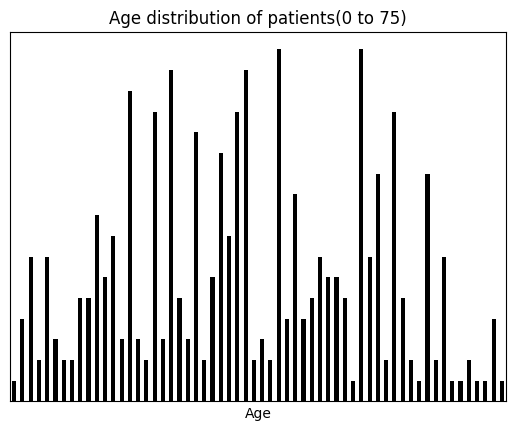

In [7]:
(df.Age.value_counts().sort_index()
     .plot(kind='bar', yticks=[], xticks=[],
         title="Age distribution of patients"
         f"({df.Age.min():.0f} to {df.Age.max():.0f})")
);

In [8]:
df.Age.mean(), df.Age.median()

(36.29608938547486, 35.0)

In [9]:
df.loc[df.Age.isnull(), 'Age'] = df.Age.median()
df.Age.value_counts().head()

Age
35.0    22
40.0    17
50.0    17
27.0    16
36.0    16
Name: count, dtype: int64

In [10]:
print("Array shape", digits.shape)

Array shape (50, 8, 8)


FileNotFoundError: [Errno 2] No such file or directory: 'img/Digits.png'

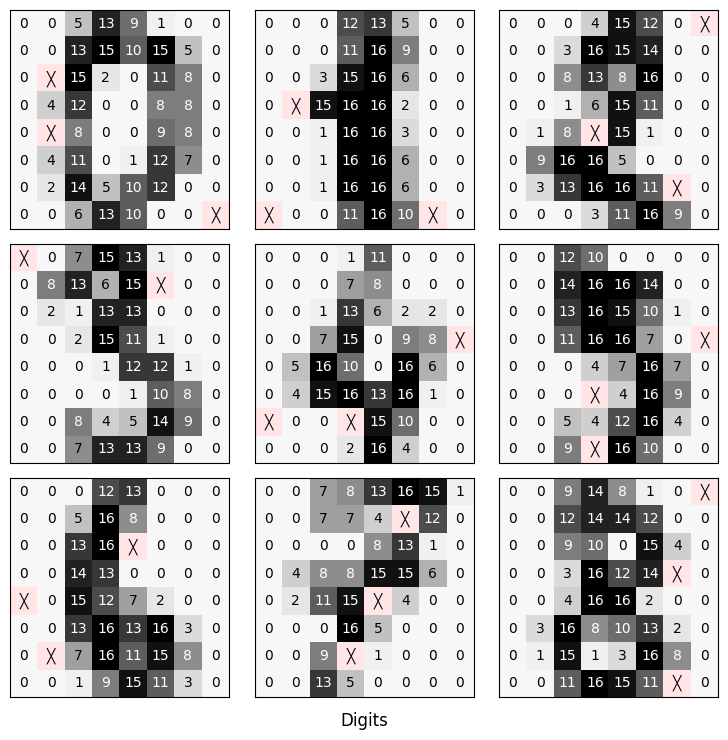

In [11]:
show_digits(digits)

In [12]:
def fill_missing(digit):
    digit = digit.copy()
    missing = np.where(digit == -1)
    for x, y in zip(*missing):
        x_start = max(0, x-1)
        y_start = max(0, y-1)

        x_end = x+2
        y_end = y+2

        # Remove all the negatives -1s

        region = digit[y_start:y_end, x_start:x_end].flatten()
        region = region[region > 0]
        total = np.sum(region)
        avg = total
        digit[x, y] = avg
    return digit

FileNotFoundError: [Errno 2] No such file or directory: 'img/Digits.png'

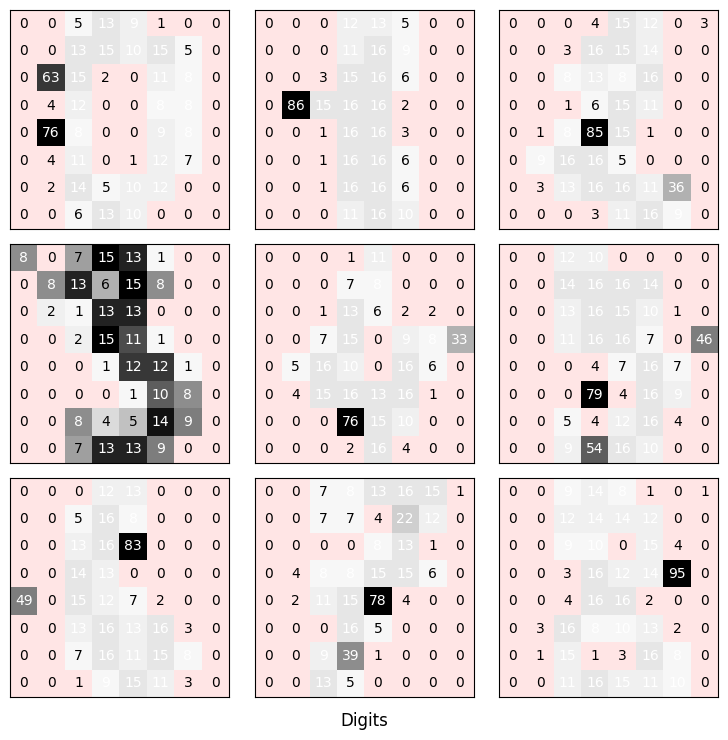

In [13]:
new = np.empty_like(digits)
for n in range(new.shape[0]):
    new[n] = fill_missing(digits[n])

show_digits(new)

In [17]:
parcl = pd.read_json("data/philly_missing.json")
parcl.sample(7, random_state=4)  # Random State highlights details

,parcel_number,year,market_value
1862,123018500.0,2014,96100.0
3921,888301242.0,2015,15000.0
617,NaN,2018,0.0
1068,311033500.0,2018,16500.0
11505,888301508.0,2015,15000.0
3843,252327300.0,2014,NaN
10717,314204200.0,2016,41800.0


In [19]:
nparcel = len(parc1[parc1.parcel_number.isnull()])
nmarket = len(parc1[parc1.market_value.isnull()])

print(f"All rows: {len(parcl):>8,}")
print(f"No parcel: {nparcel:>8,}")
print(f"No market: {nmarket:>8,}")

All rows:   18,290
No parcel:    1,140
No market:      965


In [21]:
nparcel = len(parc1[parc1.parcel_number.isnull()])
nmarket = len(parc1[parc1.market_value.isnull()])

print(f"All rows : {len(parcl):>8,}")
print(f"No parcel: {nparcel:>8,}")
print(f"No market : {nmarket:>8,}")

All rows :   18,290
No parcel:    1,140
No market :      965


In [24]:
parcl = parcl[parcl.parcel_number.notnull()]
print(f"Remaining rows: {len(parcl):,}")
stds = parcl.groupby('parcel_number')['market_value'].std()
(stds // 1000 * 1000).value_counts().head()

Remaining rows: 17,150


market_value
0.0       2360
7000.0     114
6000.0     109
2000.0     103
3000.0      83
Name: count, dtype: int64

In [25]:
parcl['parcel_number'] = parcl.parcel_number.astype(np.uint32)
parcl['year'] = pd.to_datetime(parcl.year, format="%Y")
parcl.head()

,parcel_number,year,market_value
0,213302600,2016-01-01,196800.0
1,213302600,2015-01-01,196800.0
2,213302600,2014-01-01,196800.0
3,213308200,2018-01-01,198000.0
4,213308200,2017-01-01,198000.0


### Sampling  

• Categorical variables and discretized continuous variables

• Balancing target class values

• Sampling without replacement

• Sampling with replacement

• Oversampling by duplication

• Fuzzy statistical oversampling